In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotting_tools as pt
%matplotlib inline

from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn import preprocessing

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

def cluster(data,pca_data, num_clusters):
    
    # perform clustering
    clf = KMeans(n_clusters=num_clusters)
    clf.fit(pca_data)
    centers = clf.cluster_centers_
    labels = clf.predict(pca_data)
         
    # plot clusters
    plt.figure(figsize=(20,10*num_clusters))
    for i in range(0,num_clusters):
        string = str(num_clusters)+'1'+str(i)
        plt.subplot(string)
        plot_contour(x['x_'+str(i)],y['y_'+str(i)])

    print(clf)
    
    return  x,y,dust

# exploring the properties of galaxies through multidimensional statistical analysis techniques 
# vespa data, galaxy zoo data, sdss
# 0: stellar mass
# 1: error
# 2: SFR last 115 Myr
# 3: dustVal ISM
# 4: redshift
# 5: prob. elliptical
# 6: prob. spiral
# 7: u
# 8: g
# 9: r
# 10: i
# 11: z
# 12: petro r
# 13: theta

# PCA analysis followed by fuzzy clustering

In [2]:
galaxies = np.load('/home/calum/Documents/Mphys_data/vespa_data/vespa_properties.npy')

In [3]:
x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies]
y = [row[7]-row[9] for row in galaxies]

rgalaxies = [row for row in galaxies if row[4] > 0.004 and row[4] < 0.08]
rx = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in rgalaxies]
ry = [row[7]-row[9] for row in rgalaxies]

In [124]:
data = []

for row in galaxies:
    if (row[4] > 0.004 and row[4] < 0.08) :
        # log(stellar mass)
        x0 = np.log(row[0])
        # ISM dust value
        x1 = row[3]
        # redshift
        # x2 = row[4]
        # morphology
        if row[5] > 0.8:
            # elliptical
            x3 = 1
        elif row[6] > 0.8:
            # spiral
            x3 = -1
        else:
            # should we ommit these?
            x3 = 0
        # u-r colour 3
        x4 = row[7]-row[9]
        # absolute petro mag 4
        x5 = float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10))
        # surface brightness
        x6 = row[9]+2.5*np.log10(2*np.pi*row[13]*row[13])

        # append to data
        #if x3 != 0:
        #    data.append([x5,x4,x0,x1,x3,x6])
        data.append([x5,x4])
    

In [125]:
data = np.array(data)
data.shape

(137166, 2)

In [126]:
# normalising data
data_scale = preprocessing.scale(data)
data_scale

array([[-0.58988,  0.95586],
       [-0.98402,  0.79776],
       [ 1.20116, -1.41233],
       ..., 
       [-0.62413, -0.21303],
       [-0.3013 , -0.70132],
       [ 0.97996,  0.8314 ]])

In [134]:
pca = decomposition.PCA(n_components=2)
data_pca = pca.fit_transform(data_scale)

In [135]:
data_pca.shape

(137166, 2)

In [145]:
clf = KMeans(n_clusters=2)
clf.fit(data_scale)
centers = clf.cluster_centers_
labels = clf.predict(data_scale)

In [146]:
c1 = []
c2 = []
c3 = []

for i,label in enumerate(labels):
    if label == 0:
        c1.append([data[i][0],data[i][1]])
    elif label == 1:
        c2.append([data[i][0],data[i][1]])
    elif label ==2:
        c3.append([data[i][0],data[i][1]])
        
len(c1),len(c2),len(c3),len(c1)+len(c2)+len(c3)          

(76496, 60670, 0, 137166)

(-24, -16)

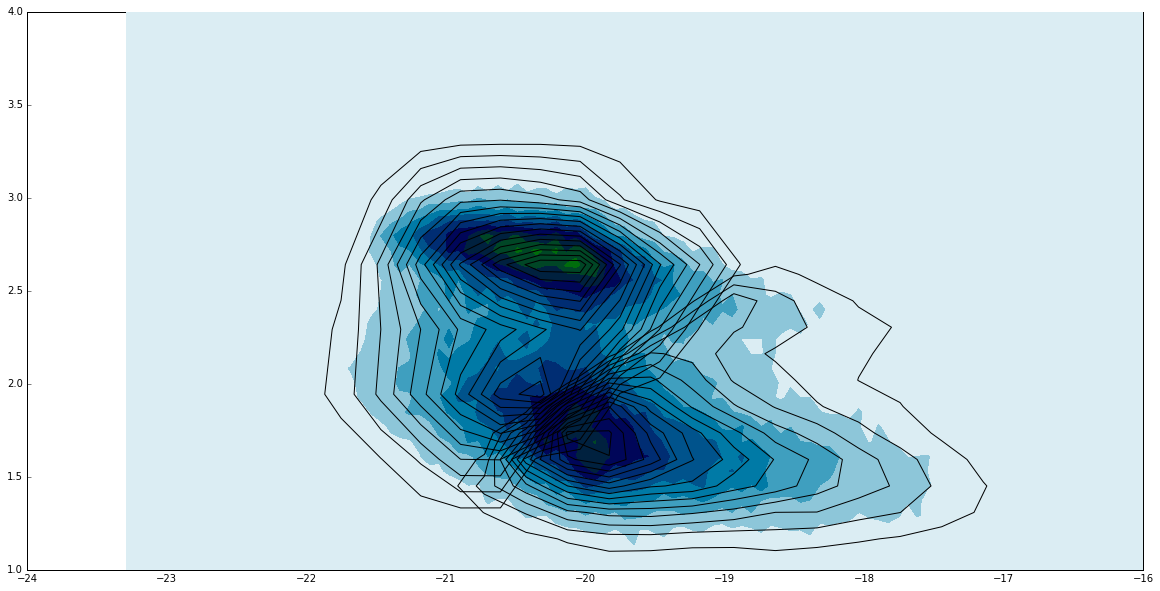

In [147]:
plt.figure(figsize=(20,10))
pt.plot_contour(x,y,bins=150,lines=10, fill=True, colours='ocean_r')
pt.plot_contour([row[0] for row in c1],[row[1] for row in c1],colours='k')
pt.plot_contour([row[0] for row in c2],[row[1] for row in c2],colours='k')
#pt.plot_contour([row[0] for row in c3],[row[1] for row in c3],colours='k')
plt.ylim(1,4)
plt.xlim(-24,-16)

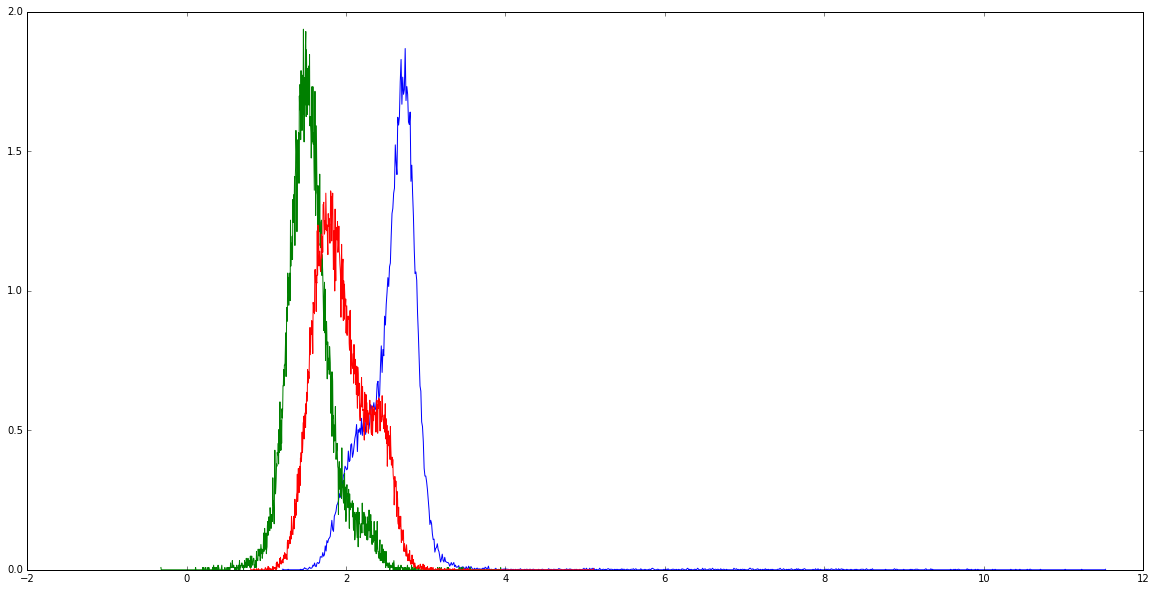

In [133]:
plt.figure(figsize=(20,10))
pt.plot_hist([row[1] for row in c1],bin_num=1000,label='c1')
pt.plot_hist([row[1] for row in c2],bin_num=1000,label='c2')
pt.plot_hist([row[1] for row in c3],bin_num=1000,label='c3')

In [123]:
pca.components_

array([[ 0.45391, -0.42824, -0.50563, -0.01708, -0.35089,  0.48115],
       [ 0.26348, -0.01783, -0.363  , -0.65416,  0.54461, -0.27195],
       [-0.55865, -0.56741,  0.18587, -0.52257, -0.24037,  0.0235 ],
       [ 0.10162, -0.66125, -0.02021,  0.47531,  0.22444, -0.52509],
       [-0.1873 , -0.1915 ,  0.12403,  0.1653 ,  0.68679,  0.64332]])

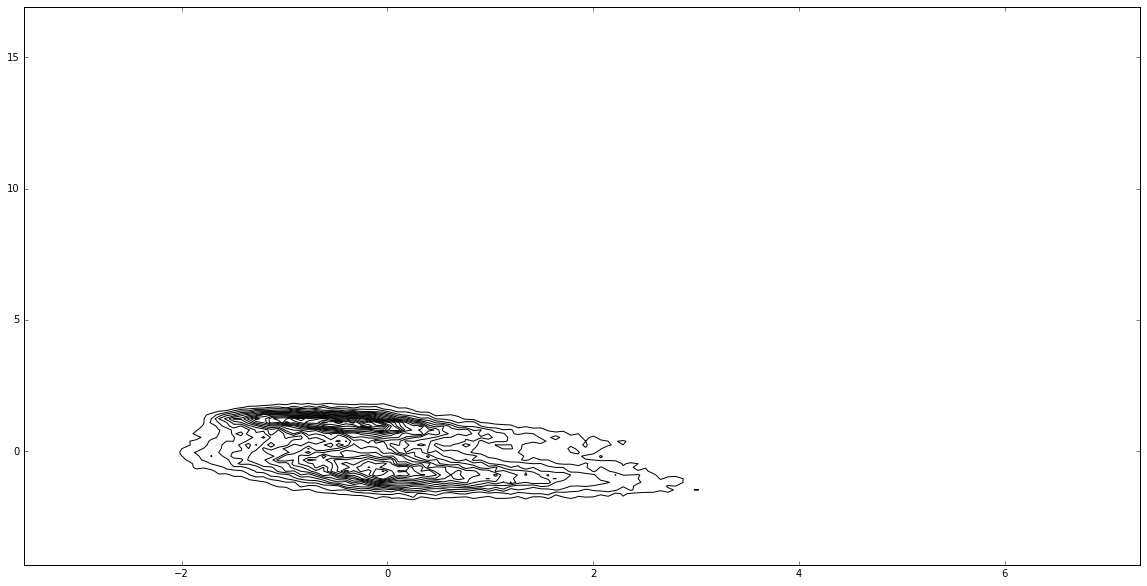

In [152]:
plt.figure(figsize=(20,10))
#pt.plot_contour(x,y,bins=150,lines=10, fill=True, colours='ocean_r')
pt.plot_contour([row[0] for row in data_scale],[row[1] for row in data_scale],bins=150,colours='k')
#plt.xlim(-3,3)
#plt.ylim(-2.5,2.5)

In [7]:
x = [float(row[12])-5*(np.log10(cosmo.luminosity_distance(row[4]).to(u.pc).value/10)) for row in galaxies if (row[7]-row[9]) < 2.25]
y = [row[7]-row[9] for row in galaxies if (row[7]-row[9]) < 2.25]

(-24, -16)

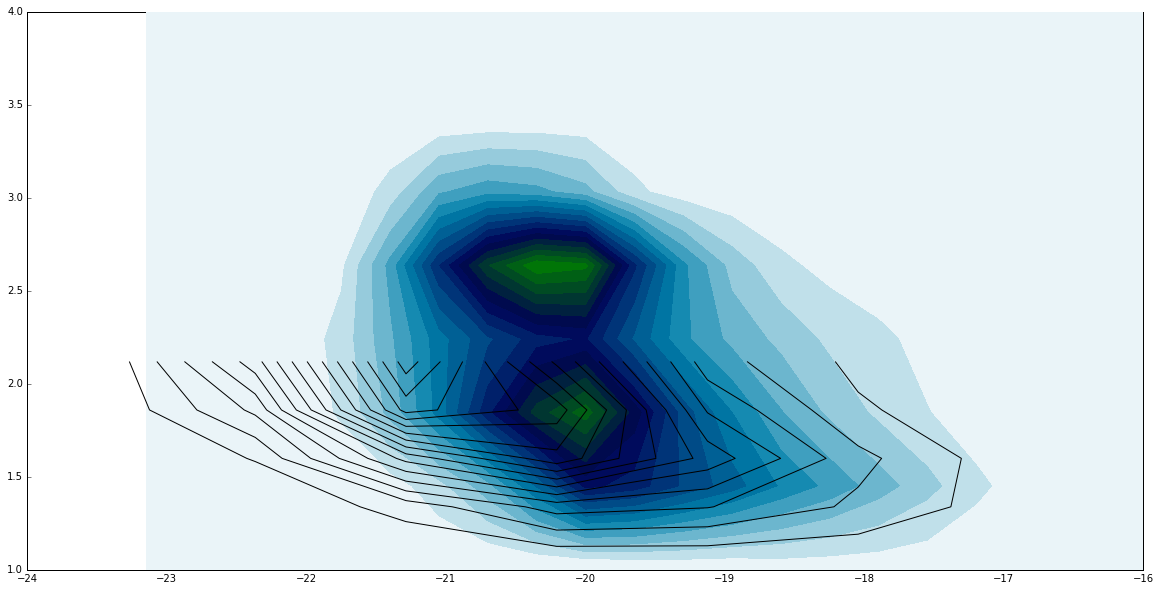

In [11]:
plt.figure(figsize=(20,10))
pt.plot_contour(rx,ry, fill=True, colours='ocean_r')
pt.plot_contour(x,y,lines=20, colours='k')
plt.ylim(1,4)
plt.xlim(-24,-16)